<a href="https://colab.research.google.com/github/Aditya-1717/Intro-to-Machine-Learning/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.optim as optim
import time

In [245]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def linear_model(t_u, w, b):
  return w * t_u + b

def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

In [246]:
#Followed from slides: This shows initial prediction and loss
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u,*parameters)
loss = loss_fn(t_p, t_c)

parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
loss = loss_fn(model(t_u, *parameters), t_c)
loss.backward()
parameters.grad

tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [247]:
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([parameters], lr=learning_rate)

normal_t = t_u * 0.1
tp = model(normal_t, *parameters)
loss = loss_fn(tp, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()
parameters

tensor([ -1.7968, -16.3953,  -0.4818], requires_grad=True)

In [248]:
def training_loop(n_epochs, optimizer, parameters, t_u, t_c, model_function):
    for epoch in range(1, n_epochs + 1):
        t_p = model_function(t_u, *parameters)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return parameters

parameters_initial = [1.0, 1.0, 0.0]
learning_rates = [0.1, 0.0002, 0.0008, 0.0001]

best_loss = float('inf')
best_params = None
best_lr = None

for lr in learning_rates:
    print("Learning Rate Training =", lr)

    parameters = torch.tensor(parameters_initial, requires_grad=True)
    optimizer = optim.SGD([parameters], lr=lr)

    trained_parameters = training_loop(
        n_epochs = 5000,
        optimizer = optimizer,
        parameters = parameters,
        t_u= normal_t,
        t_c= t_c,
        model_function = model
    )

    final_loss = loss_fn(model(normal_t, *trained_parameters), t_c)
    print("Final loss:", float(final_loss))

    if final_loss < best_loss:
        best_loss = final_loss
        best_parameters = trained_parameters.clone()
        best_lr = lr

    print("Final params:", trained_parameters)
    print("")

print("Best nonlinear learning rate:", best_lr)
print("Best nonlinear final loss:", float(best_loss))
print("Best params:", best_parameters)

Learning Rate Training = 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Final loss: nan
Final params: tensor([nan, nan, nan], requires_grad=True)

Learning Rate Training = 0.0002
Epoch 500, Loss 8.644965
Epoch 1000, Loss 6.124641
Epoch 1500, Loss 4.845726
Epoch 2000, Loss 4.194871
Epoch 2500, Loss 3.861782
Epoch 3000, Loss 3.689472
Epoch 3500, Loss 3.598522
Epoch 4000, Loss 3.548753
Epoch 4500, Loss 3.519840
Epoch 5000, Loss 3.501493
Final loss: 3.5014634132385254
Final params: tensor([-1.1697,  0.6078, -1.1362], requires_grad=True)

Learning Rate Training = 0.0008
Epoch 500, Loss 4.195781
Epoch 1000, Loss 3.548735
Epoch 1500, Loss 3.478307
Epoch 2000, Loss 3.446147
Epoch 2500, Loss 3.417074
Epoch 3000, Loss 3.388778
Epoch 3500, Loss 3.361097
Epoch 4000, Loss 3.334007
Epoch 4500, Loss 3.307492
Epoch 5000, Loss 3.281543
Fin

Epoch 500, Loss 25.644270
Epoch 1000, Loss 22.094957
Epoch 1500, Loss 19.100206
Epoch 2000, Loss 16.573353
Epoch 2500, Loss 14.441303
Epoch 3000, Loss 12.642381
Epoch 3500, Loss 11.124518
Epoch 4000, Loss 9.843812
Epoch 4500, Loss 8.763214
Epoch 5000, Loss 7.851448

Linear Model Final Loss: 7.849772930145264
Best Nonlinear Model Final Loss: 3.2814924716949463


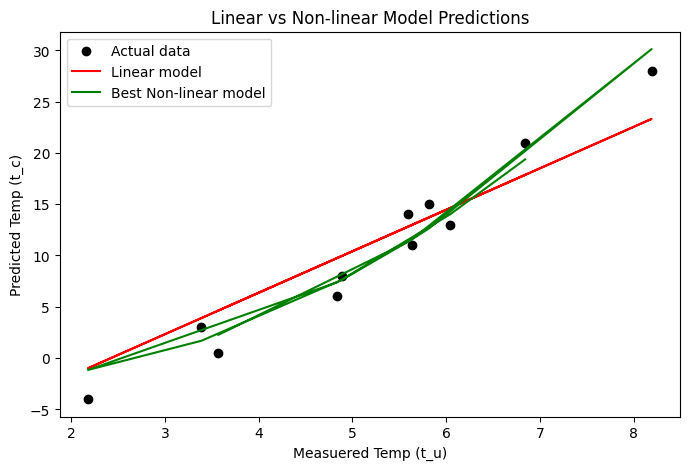

In [249]:
#Comparing linear and nonliner loss
parameters_linear = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer_linear = optim.SGD([parameters_linear], lr=0.001)

trained_linear_parameters = training_loop(
    n_epochs = 5000,
    optimizer = optimizer_linear,
    parameters = parameters_linear,
    t_u = normal_t,
    t_c = t_c,
    model_function = linear_model
)

predict_linear = linear_model(normal_t, *trained_linear_parameters)
predict_nonlinear = model(normal_t, *best_parameters)

loss_linear = loss_fn(predict_linear, t_c)
loss_nonlinear = loss_fn(predict_nonlinear, t_c)
print("\nLinear Model Final Loss:", float(loss_linear))
print("Best Nonlinear Model Final Loss:", float(loss_nonlinear))

#Plot
plt.figure(figsize=(8,5))
plt.scatter(normal_t, t_c, color='black', label='Actual data')
plt.plot(normal_t, predict_linear.detach(), color='red', label='Linear model')
plt.plot(normal_t, predict_nonlinear.detach(), color='green', label='Best Non-linear model')
plt.xlabel('Measuered Temp (t_u)')
plt.ylabel('Predicted Temp (t_c)')
plt.title('Linear vs Non-linear Model Predictions')
plt.legend()
plt.show()

In [250]:
#Problem 2
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.read_csv(url)

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = housing[inputs].values
Y = housing['price'].values
m = len(Y)

X_0 = np.ones((m, 1))
X = np.hstack((X_0, X))
theta = np.zeros(X.shape[1])

#Train/Test and scale
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [251]:
Xtra = torch.tensor(X_train, dtype=torch.float32)
Ytra = torch.tensor(Y_train, dtype=torch.float32).view(-1,1)
Xt = torch.tensor(X_test, dtype=torch.float32)
Yt = torch.tensor(Y_test, dtype=torch.float32).view(-1,1)

#Initialize parameters
parameters = torch.zeros((6,1), requires_grad=True)

#U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B
def linear_housemodel(X, p):
    return p[0] + torch.sum(X[:, 1:] * p[1:].T, dim=1, keepdim=True)

def train_linear(n_epochs, optimizer, params, X, Y):
    for ep in range(1, n_epochs + 1):
        Y_pred = linear_housemodel(X, params)
        loss = mse_loss(Y_pred, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if ep % 500 == 0:
            print(f"Epoch {ep:4d} | Train Loss: {loss.item():.3f}")
    return params

# Run training
opt = optim.SGD([parameters], lr=0.01)
trained_parameters = train_linear(5000, opt, parameters, Xtra, Ytra)

# Evaluate
with torch.no_grad():
    preds_val = linear_housemodel(Xt, trained_parameters)
    val_loss = mse_loss(preds_val, Yt)
print(f"\nValidation Loss: {val_loss.item():.6f}")
print(f"Learned Parameters: {trained_parameters.view(-1).tolist()}")

# Test different learning rates
for lr in [0.1, 0.0002, 0.0008, 0.0001]:
    print(f"\nTesting learning rate {lr}")
    temp_params = torch.zeros((6, 1), requires_grad=True)
    opt = optim.SGD([temp_params], lr=lr)
    for e in range(1, 5001):
        pred = linear_housemodel(Xtra, temp_params)
        loss = mse_loss(pred, Ytra)
        opt.zero_grad()
        loss.backward()
        opt.step()
        if e % 500 == 0:
            with torch.no_grad():
                val_pred = linear_housemodel(Xt, temp_params)
                v_loss = mse_loss(val_pred, Yt)
            print(f"Epoch {e} | Train Loss={loss.item():.3f} | Val Loss={v_loss.item():.3f}")

Epoch  500 | Train Loss: 1699869229056.000
Epoch 1000 | Train Loss: 1556255604736.000
Epoch 1500 | Train Loss: 1481826238464.000
Epoch 2000 | Train Loss: 1436944564224.000
Epoch 2500 | Train Loss: 1408153026560.000
Epoch 3000 | Train Loss: 1389229244416.000
Epoch 3500 | Train Loss: 1376647905280.000
Epoch 4000 | Train Loss: 1368219713536.000
Epoch 4500 | Train Loss: 1362538266624.000
Epoch 5000 | Train Loss: 1358683963392.000

Validation Loss: 2313702866944.000000
Learned Parameters: [2369720.0, 4018960.25, 1111862.125, 3196028.0, 1493113.125, 1142282.0]

Testing learning rate 0.1
Epoch 500 | Train Loss=1358686322688.000 | Val Loss=2313595125760.000
Epoch 1000 | Train Loss=1350310166528.000 | Val Loss=2293964996608.000
Epoch 1500 | Train Loss=1350024036352.000 | Val Loss=2292591099904.000
Epoch 2000 | Train Loss=1350009225216.000 | Val Loss=2292614692864.000
Epoch 2500 | Train Loss=1350008176640.000 | Val Loss=2292681277440.000
Epoch 3000 | Train Loss=1350008176640.000 | Val Loss=22927

In [252]:
#Problem 3
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = torch.nn.Linear(6, 8)
        self.output = torch.nn.Linear(8, 1)
    def forward(self, x):
        return self.output(torch.relu(self.hidden(x)))

net = SimpleNN()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

start_time = time.time()
for epoch in range(1, 201):
    y_pred = net(Xtra)
    loss = criterion(y_pred, Ytra)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()

print(f"Training Time: {end_time - start_time:.3f} seconds")
print(f"Final Training Loss: {loss.item():.3f}")

with torch.no_grad():
    y_eval = net(Xt)
SS_res = torch.sum((Yt - y_eval) ** 2)
SS_tot = torch.sum((Yt - torch.mean(Yt)) ** 2)
r2_score = 1 - SS_res / SS_tot
print(f"Evaluation R² Score: {r2_score.item():.3f}")

class DeepNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(6, 8)
        self.fc2 = torch.nn.Linear(8, 16)
        self.fc3 = torch.nn.Linear(16, 32)
        self.fc4 = torch.nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

deep_net = DeepNN()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(deep_net.parameters(), lr=1e-10)

start = time.time()
for e in range(1, 201):
    out = deep_net(Xtra)
    loss = criterion(out, Ytra)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end = time.time()

print(f"\nDeep NN Training Time: {end - start:.3f} seconds")
print(f"Final Training Loss: {loss.item():.3f}")

with torch.no_grad():
    y_val_pred = deep_net(Xt)
SS_res = torch.sum((Yt - y_val_pred)**2)
SS_tot = torch.sum((Yt - torch.mean(Yt))**2)
R2_deep = 1 - SS_res / SS_tot
print(f"Deep NN Evaluation R² Score: {R2_deep.item():.3f}")


Training Time: 0.108 seconds
Final Training Loss: 3172812980224.000
Evaluation R² Score: -0.070

Deep NN Training Time: 0.162 seconds
Final Training Loss: 25234788843520.000
Deep NN Evaluation R² Score: -4.961
